In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Subproject5 Visualization
### Load Model Training Output Data
From the previous section, we stored the model training outputs. We will use this cached data for visualization purposes. This is so we do not have to train our model every time before we want to analyze the results.

In [2]:
def open_training_output_file(path):
    with open(path, "r") as file:
        json_str = file.read()
    return json.loads(json_str)

sgd_output_base_path = "./output"

# change the filenames below accordingly. 
### note that when running both GF and CF visualization, hyperparameter configs MUST match
sgd_output_filename = f"{gd_output_base_path}/2022-02-14_17-55-55.706677_GD_degree-4_epochs-100000_eta-0.01-0.001-0.0001_lam-0.01-0.001-0.json"
gd_training_output = open_training_output_file(sgd_output_filename)

sgd_results = gd_training_output["results"]

training_metadata = gd_training_output["metadata"]

# get metadata - metadata will be the same for GF and CF (sorta)
max_degree = training_metadata["max_degree"]
training_iterations = training_metadata["training_iterations"]
eta_list = training_metadata["eta_list"]
lam_list = training_metadata["lam_list"]
iteration_step = training_metadata["iteration_step"]

### Optimal Training Hyperparameters
We can find the optimal training parameters by finding the training run that yielded the smallest validation error.

In [3]:
sgd_fields_to_display = ["degree", "iterations", "eta", "lam", "train_time", "min_train_mse", "min_train_mse_epoch", "min_test_mse", "min_test_mse_epoch"]

def format_training_result_string(item, fields): 
    """
        Helper to generate for a training result only containing 
        a defined subset of dictionary properties
        
        parameters
            item: dictionary object containing results for a single training run
            fields: list of field names to display
        returns
            string
    """
    formatted_string = ""
    
    for field in fields:
        field_data = item[field]
        formatted_string += f"\t{field}: {field_data}\n"
        
    return formatted_string
    
best_sgd_train = min(sgd_results, key=lambda x: x["min_test_mse"])
print(f"Stochastic Gradient Descent - Minimum Validation MSE Training Run:\n{format_training_result_string(best_sgd_train, sgd_fields_to_display)}\n")

Gradient Descent - Minimum Validation MSE Training Run:
	degree: 4
	epochs: 100000
	eta: 0.01
	lam: 0.01
	train_time: 518.0089991092682
	min_train_mse: 0.0021610475182280257
	min_train_mse_epoch: 99000
	min_test_mse: 0.01486817938701733
	min_test_mse_epoch: 99000


Closed Form - Minimum Validation MSE Training Run:
	degree: 3
	lam: 0.01
	train_mse: 0.001716402576403505
	test_mse: 0.015621546457051957




### Plotting Output Config

In [4]:
# plotting config
sgd_plot_output_path = "./output/plots"

# Gradient Descent Method
### Set up the Plotting X-Axis

In [5]:
# calculate our gd x-axis
x_axis = []
for i in range(1, (training_epochs // epoch_step) + 1):
    x_axis.append(i * epoch_step)

print(epoch_step) # debug
print(x_axis) # debug

def get_epoch_index(epoch):
    """
        return the scaled index in our x-axis list for a given epoch
        e.g. (99,000) -> return 99 (epoch_step = 1000) 
    """
    return epoch // epoch_step

1000
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000]


### Plotting Regularization vs. MSE

Pseudo-Code for the algorithm below:
- for each degree
    - create fig, 
        
    - for the fig, create subplots; number of subplots = `len(lams) * len(etas) * 2`
    
    - for each $\eta$ value create a subplot
        - on each subplot for $\eta$, plot all vals of $\lambda$ with legend

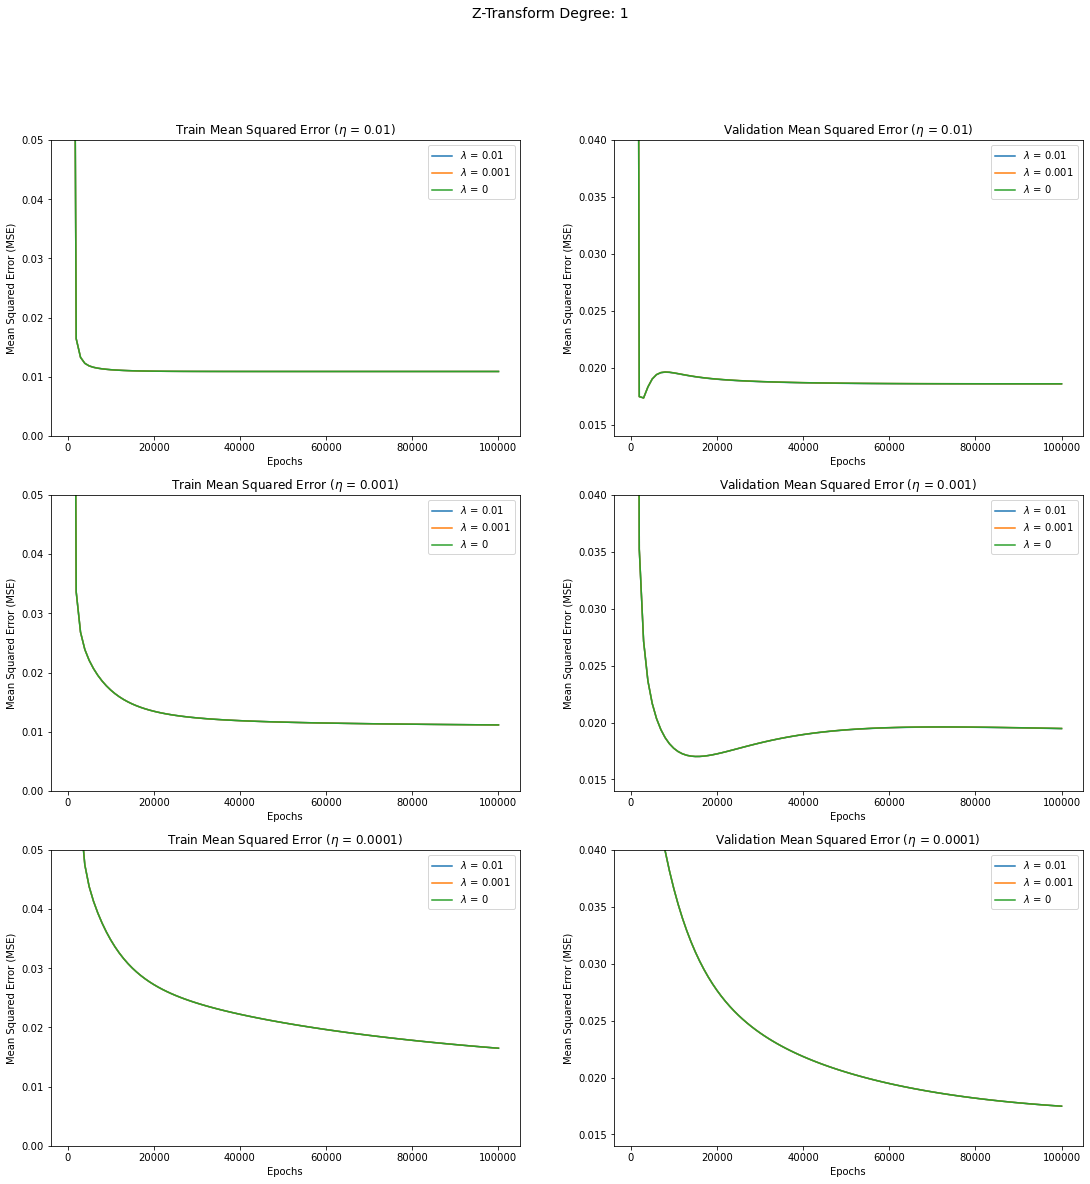

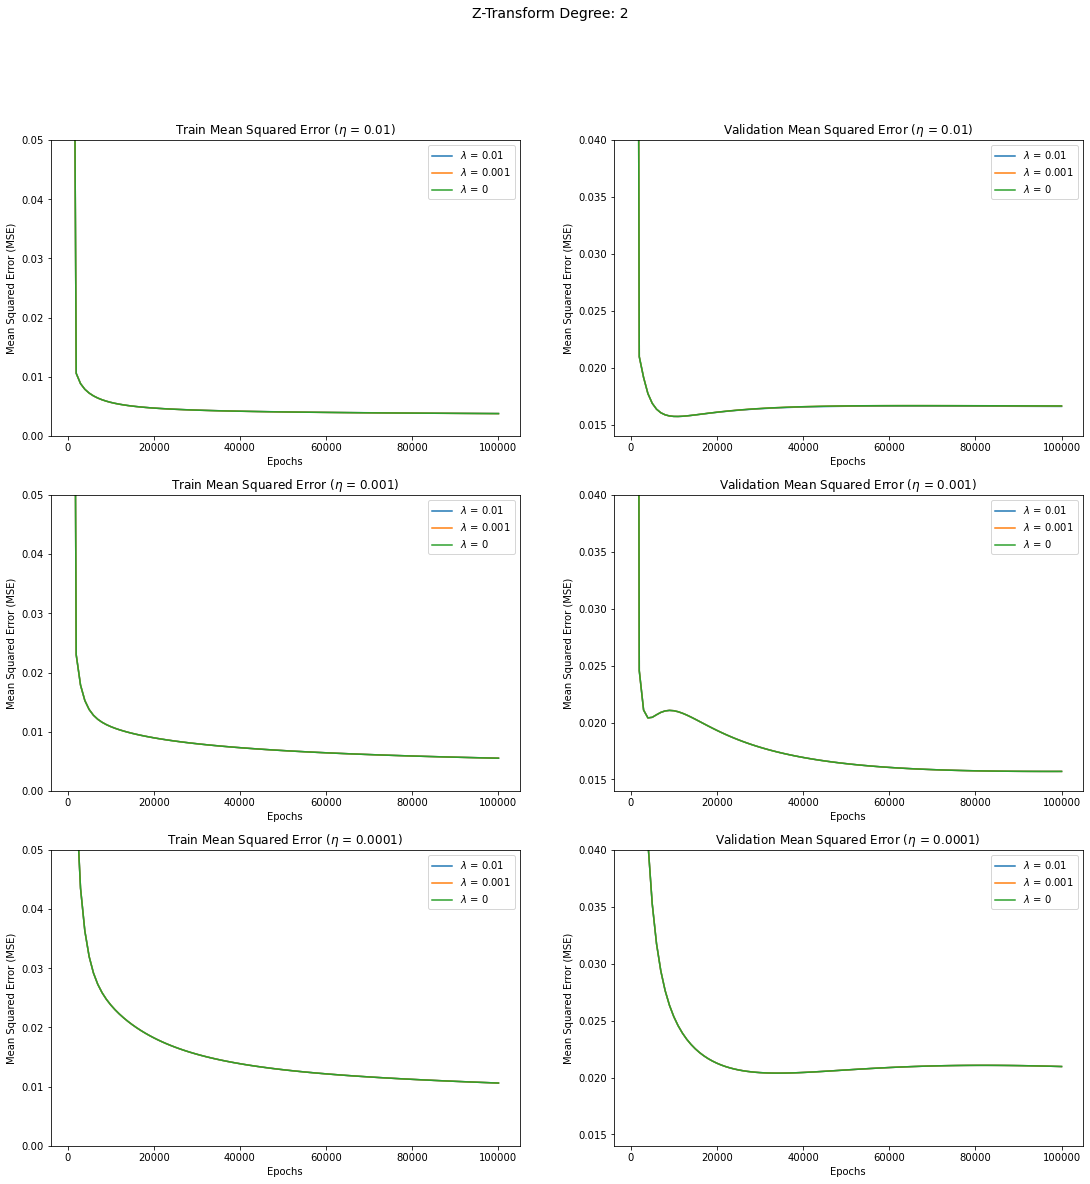

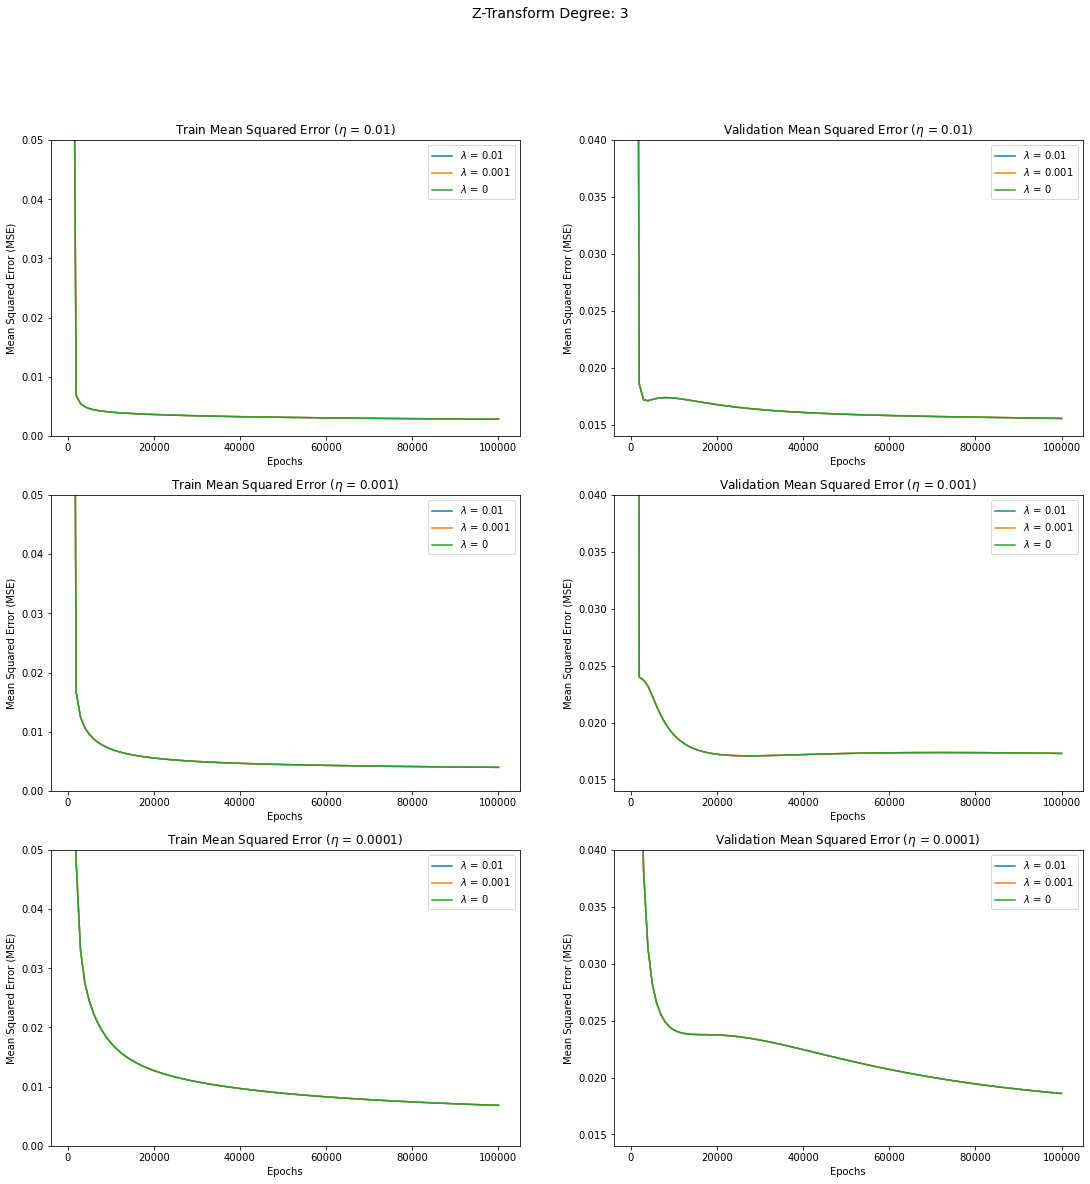

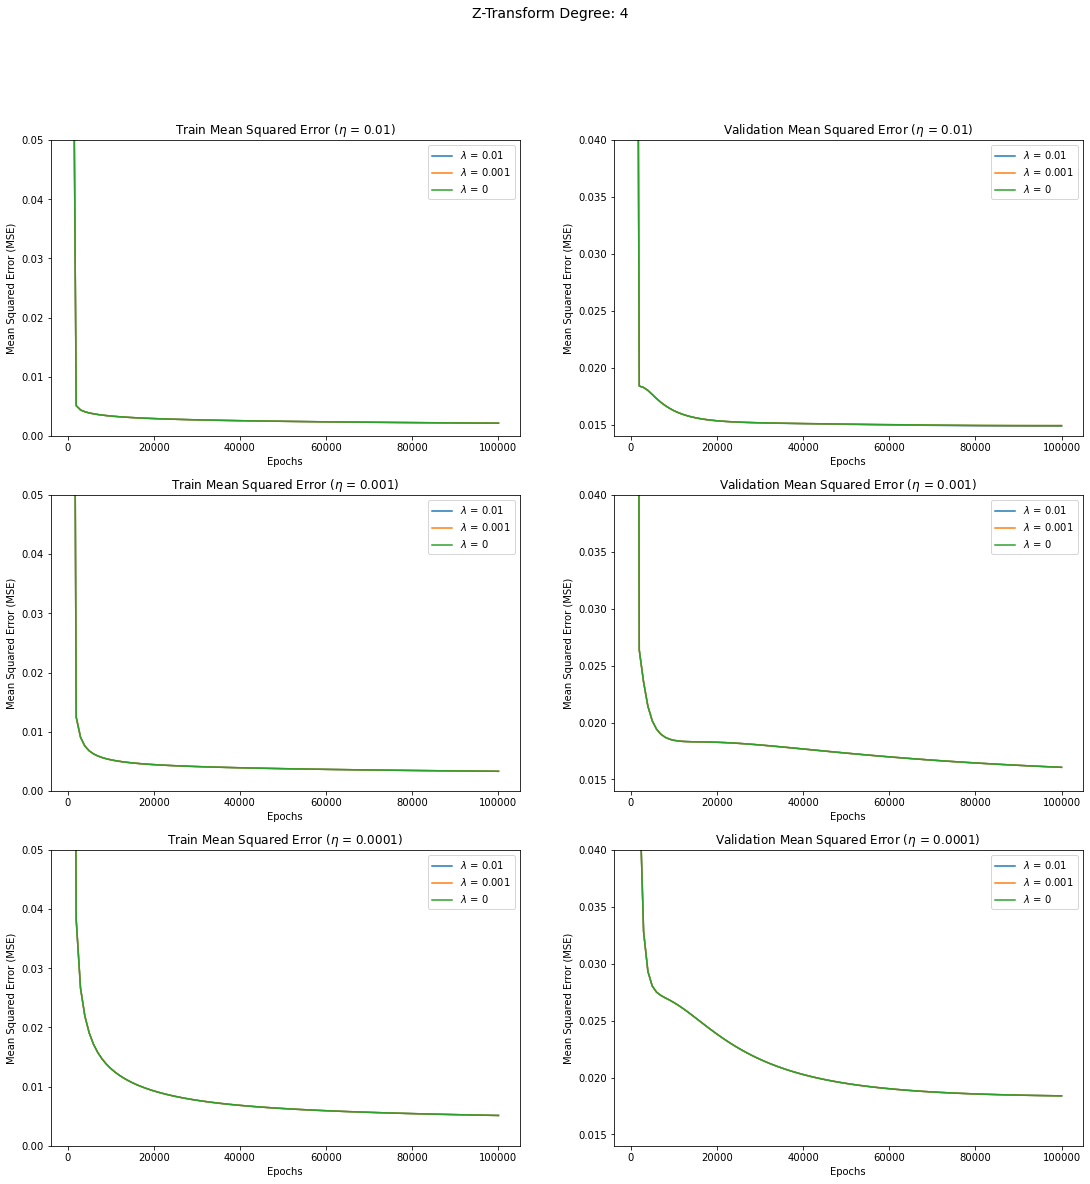

In [6]:
epoch_start_index = None
epoch_end_index = None
subplot_rows = len(eta_list)
subplot_cols = 2
        
# for each degree we create a figure
for r in np.arange(1, max_degree + 1):
    degree_fig = plt.figure()
    
    # figure config    
    degree_fig.set_size_inches(18.5, 18.5)
    degree_fig.suptitle(f'Z-Transform Degree: {r}', fontsize=14)
    
    # subplot for each eta value
    for i, eta_val in enumerate(eta_list):
        
        train_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 1)
        test_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 2)
        
        train_mse_ax.set_title(f"Train Mean Squared Error ($\eta$ = {eta_val})")
        train_mse_ax.set_ylabel("Mean Squared Error (MSE)")
        train_mse_ax.set_xlabel("Epochs")
        
        test_mse_ax.set_title(f"Validation Mean Squared Error ($\eta$ = {eta_val})")
        test_mse_ax.set_ylabel("Mean Squared Error (MSE)")
        test_mse_ax.set_xlabel("Epochs")

        # plot a line on the subplot for each lambda
        for lam_val in lam_list:
        
            y_val = list(filter(lambda x: 
                                x["degree"] == r and 
                                x["epochs"] == training_epochs and 
                                x["eta"] == eta_val and 
                                x["lam"] == lam_val, 
                                gf_results))
            
            y_train_mse = y_val[0]["train_mse"]
            y_test_mse = y_val[0]["test_mse"]
            
            train_mse_ax.plot(x_axis[epoch_start_index:epoch_end_index], 
                              y_train_mse[epoch_start_index:epoch_end_index], 
                              label=f"$\lambda$ = {lam_val}")

            test_mse_ax.plot(x_axis[epoch_start_index:epoch_end_index], 
                             y_test_mse[epoch_start_index:epoch_end_index], 
                             label=f"$\lambda$ = {lam_val}")

        train_mse_ax.legend()
        test_mse_ax.legend()
        train_mse_ax.set_ylim([0, 0.05])
        test_mse_ax.set_ylim([0.014, 0.04])
        
    # save output
    degree_fig.savefig(f"{gd_plot_output_path}/gd_fig_degree-{r}-LAM_legend.jpeg") # TODO: make better name

plt.show()

## Plotting Learning Rate vs. MSE
We use the same algorithm as the previous cell but now create subplots for each $\lambda$ plotting all $\eta$ values.

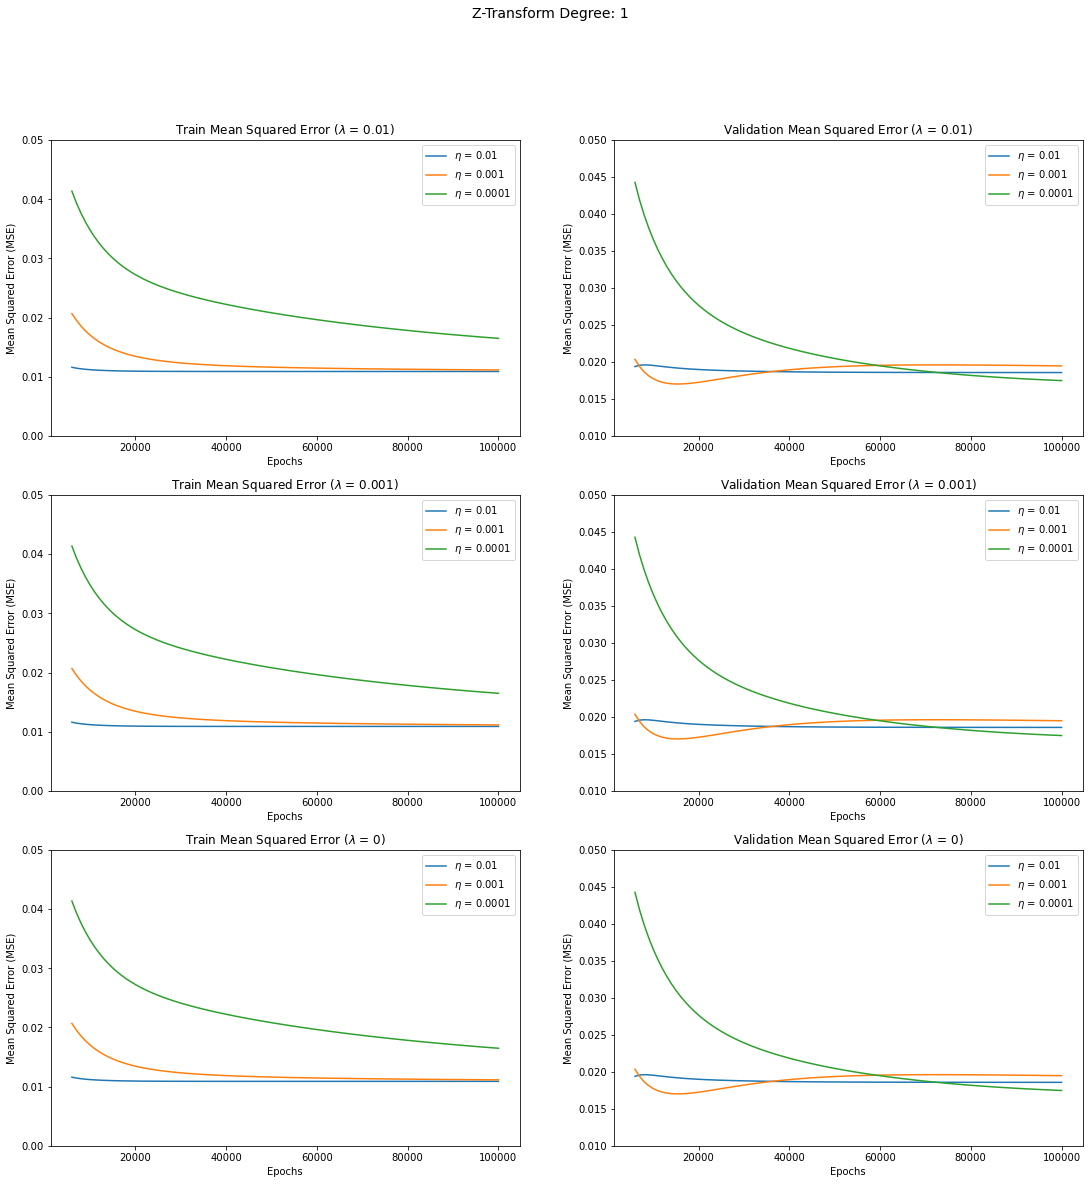

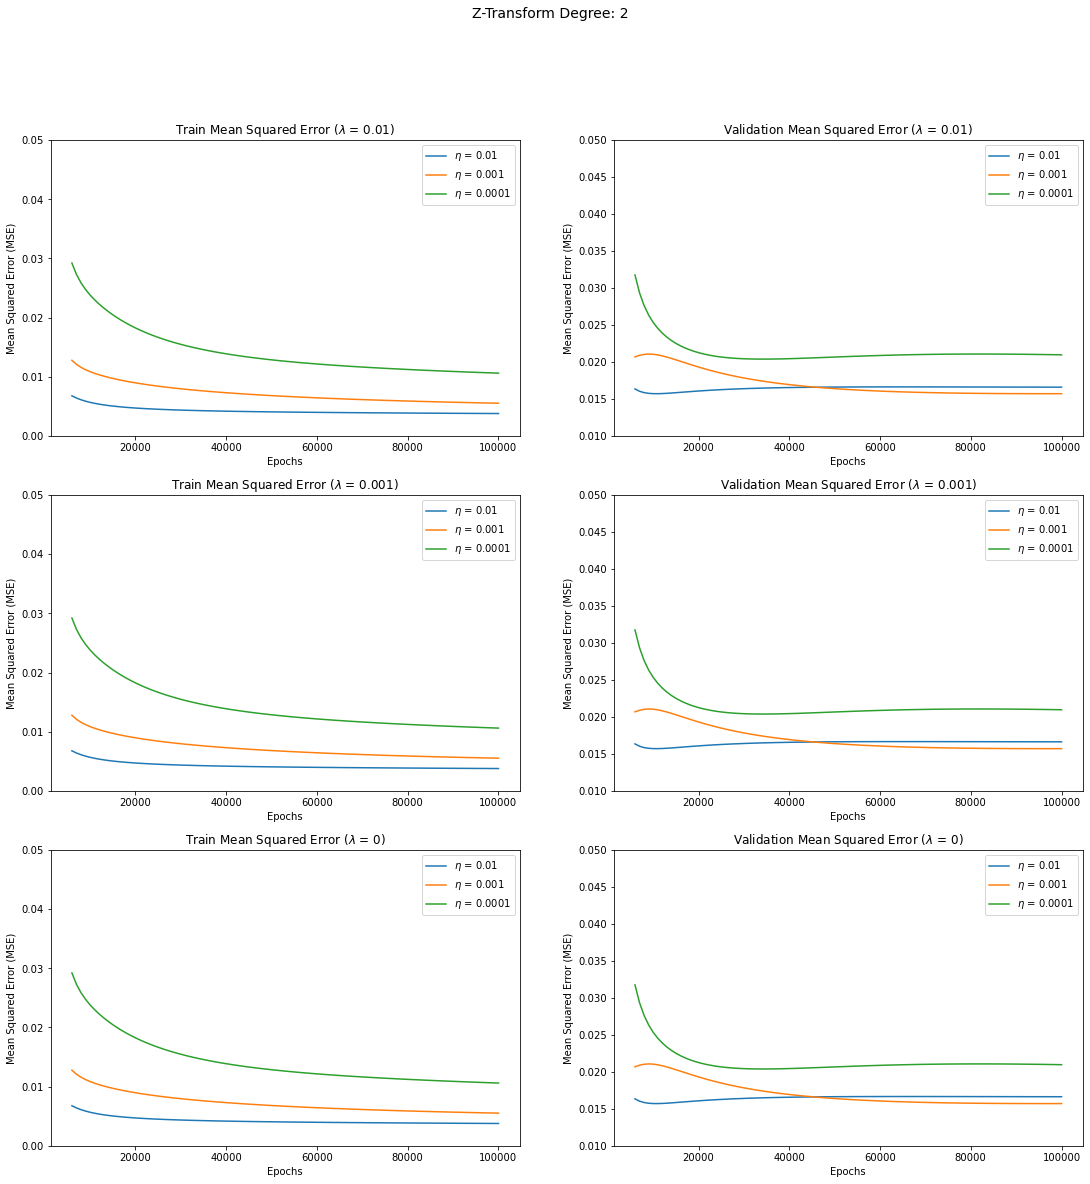

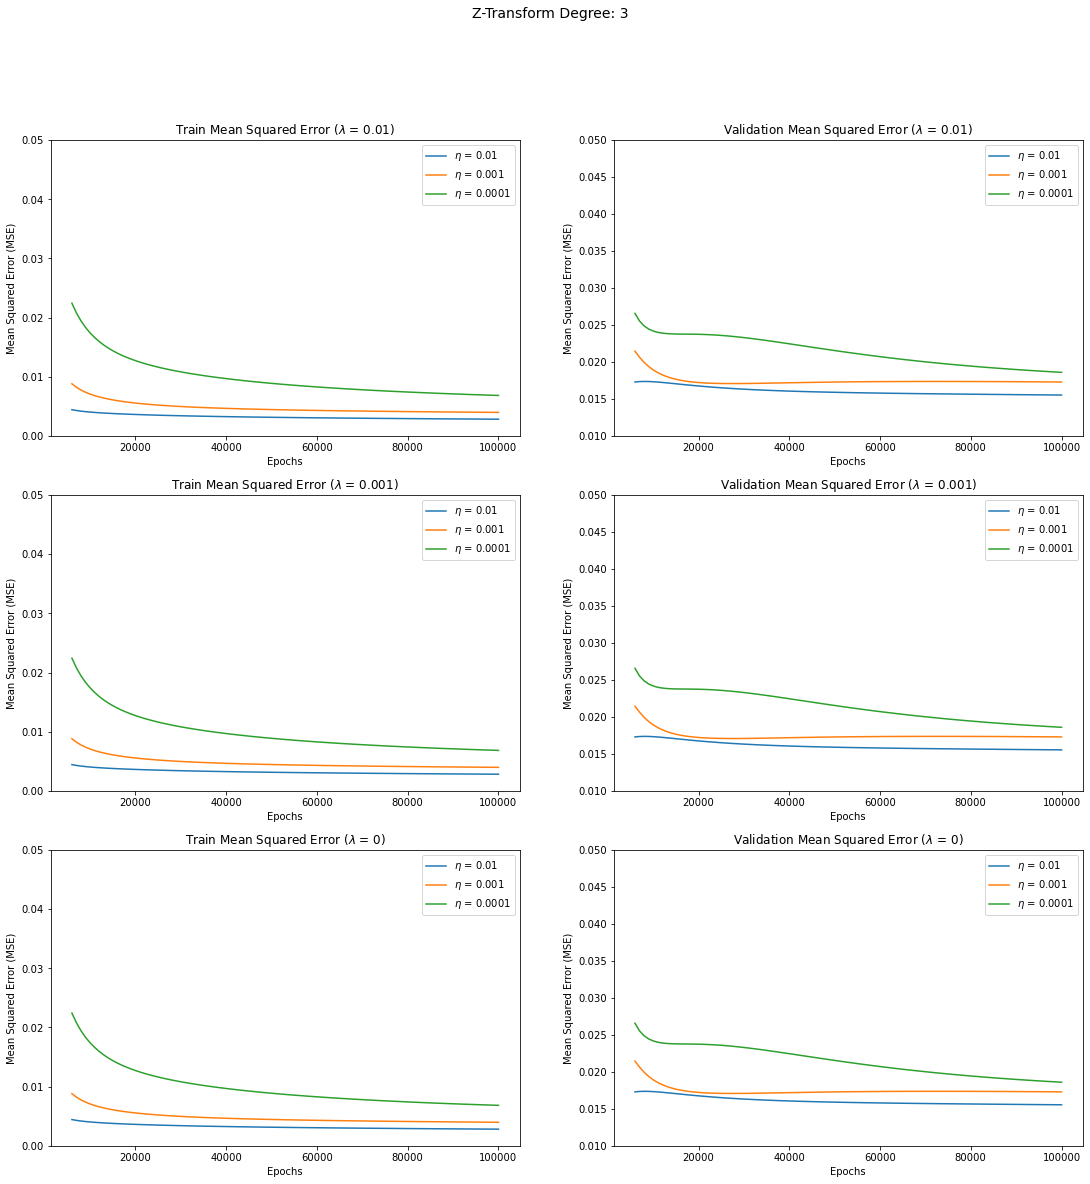

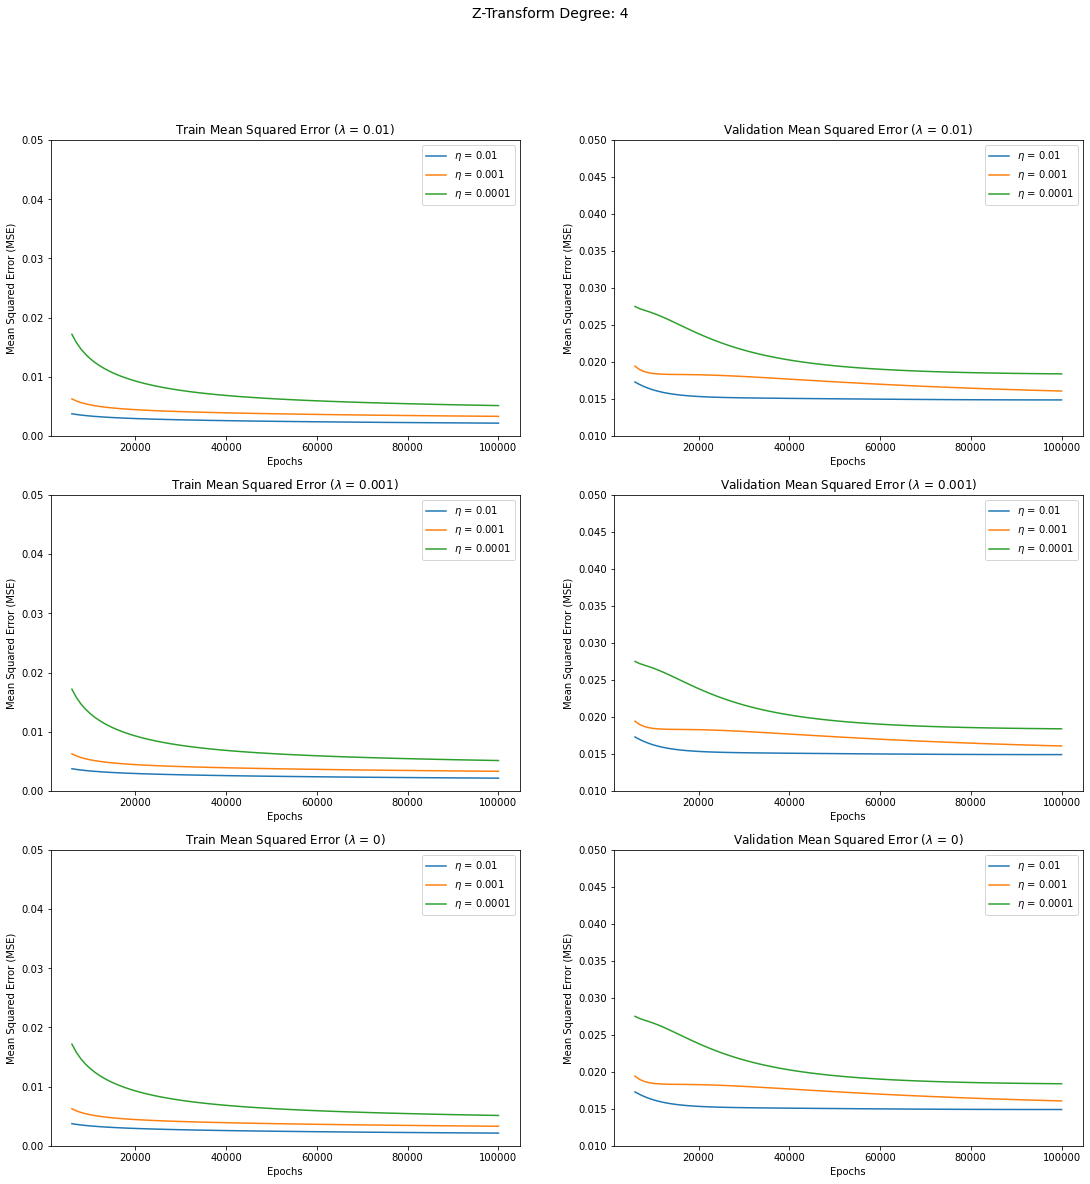

In [7]:
# plotting config
epoch_start_index = 5
epoch_end_index = None
subplot_rows = len(lam_list)
subplot_cols = 2

# our x-axis
# x_epochs = np.arange(training_epochs)

# for each degree we create a figure
for r in np.arange(1, max_degree + 1):
    degree_fig = plt.figure()
    
    # figure config    
    degree_fig.set_size_inches(18.5, 18.5)
    degree_fig.suptitle(f'Z-Transform Degree: {r}', fontsize=14)
    
    # subplot for each eta value
    for i, lam_val in enumerate(lam_list):
        
        train_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 1)
        test_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 2)
        
        train_mse_ax.set_title(f"Train Mean Squared Error ($\lambda$ = {lam_val})")
        train_mse_ax.set_ylabel("Mean Squared Error (MSE)")
        train_mse_ax.set_xlabel("Epochs")
        
        test_mse_ax.set_title(f"Validation Mean Squared Error ($\lambda$ = {lam_val})")
        test_mse_ax.set_ylabel("Mean Squared Error (MSE)")
        test_mse_ax.set_xlabel("Epochs")

        # plot a line on the subplot for each lambda
        for eta_val in eta_list:
        
            y_val = list(filter(lambda x: 
                                x["degree"] == r and 
                                x["epochs"] == training_epochs and 
                                x["eta"] == eta_val and 
                                x["lam"] == lam_val, 
                                gf_results))
            
            y_train_mse = y_val[0]["train_mse"]
            y_test_mse = y_val[0]["test_mse"]

            train_mse_ax.plot(x_axis[epoch_start_index:epoch_end_index], 
                              y_train_mse[epoch_start_index:epoch_end_index], 
                              label=f"$\eta$ = {eta_val}")

            test_mse_ax.plot(x_axis[epoch_start_index:epoch_end_index], 
                             y_test_mse[epoch_start_index:epoch_end_index], 
                             label=f"$\eta$ = {eta_val}")

        train_mse_ax.legend()
        test_mse_ax.legend()
        
        train_mse_ax.set_ylim([0, 0.05])
        test_mse_ax.set_ylim([0.01, 0.05])
        
    # save output
    degree_fig.savefig(f"{gd_plot_output_path}/gd_fig_degree-{r}-ETA_legend.jpeg") # TODO: make better name

plt.show()

# Closed Form Method

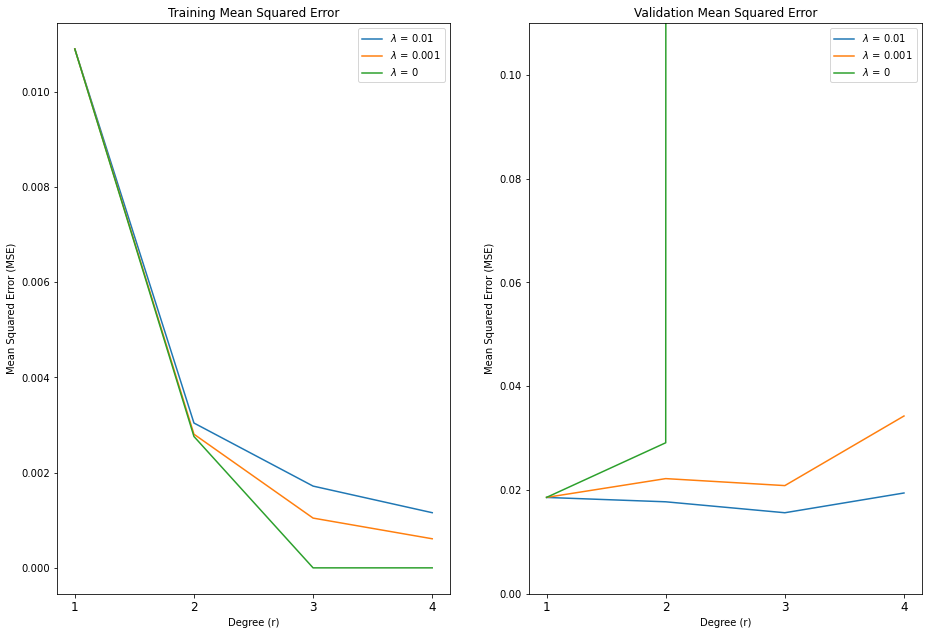

In [9]:
def plot_cf_ax(ax, x, lam_list, train=False):
    """
        parameters
            ax: matplotlib axis plot
            x: list of x-values; a list of our degrees trained on
            lam_list: list of lambda values used in training
            train: boolean, True -> training subplot; False -> test subplot
    """
    # ax subplot config
    title = "Training" if train else "Validation"
    ax.set_title(f"{title} Mean Squared Error")
    ax.set_ylabel("Mean Squared Error (MSE)")
    ax.set_xlabel("Degree (r)")
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=12)
    
    # for each degree
    for lam_val in lam_list:
        y_vals = [] # y-vals to plot for r
        for r in x:
            y_val = list(filter(lambda x: x["degree"] == r and x["lam"] == lam_val, cf_results))
            
            mse_key = "train_mse" if train else "test_mse"
            mse = y_val[0][mse_key]
            y_vals.append(mse)
            
        ax.plot(x, y_vals, label=f"$\lambda$ = {lam_val}")
            
    ax.legend()
    
    # do special ylim for test_mse
    if not train:
        ax.set_ylim([0, 0.11])

    
cf_fig, cf_axes = plt.subplots(ncols=2, nrows=1, figsize=(15.5, 10.5))

x_degree = np.arange(1, max_degree + 1)

plot_cf_ax(cf_axes[0], x_degree, lam_list, train=True)
plot_cf_ax(cf_axes[1], x_degree, lam_list, train=False)

# save output
cf_fig.savefig(f"{cf_plot_output_path}/cf_fig_degree-{max_degree}_LAM_legend.jpeg") # TODO: make better name

plt.show()